In [2]:
import os
import csv
import pprint
import numpy as np
import matplotlib.pyplot as plt
from evaluator import cache_hit_rate_evaluator, measure_chr_by_checkpoints, plot_hit_rates
from utils import save_pickle, load_pickle
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
eval_config = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned"
}

checkpoint_path_prefix = './result/checkpoints/model_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in range(30, 301, 30)]

# mesure cache hit rate by checkpoints
map_checkpoint_to_chr = measure_chr_by_checkpoints(eval_config, checkpoints)

In [4]:
for checkpoint, hit_rates in map_checkpoint_to_chr.items():
    print(f"{checkpoint}: {np.mean(hit_rates)}")

./result/checkpoints/model_30.ckpt: 0.1890119693923418
./result/checkpoints/model_60.ckpt: 0.18882203432398334
./result/checkpoints/model_90.ckpt: 0.20588709692897952
./result/checkpoints/model_120.ckpt: 0.2061966103397777
./result/checkpoints/model_150.ckpt: 0.21210130617531348
./result/checkpoints/model_180.ckpt: 0.21312054571064384
./result/checkpoints/model_210.ckpt: 0.2148520070184799
./result/checkpoints/model_240.ckpt: 0.21480030026957508
./result/checkpoints/model_270.ckpt: 0.21543769972067445
./result/checkpoints/model_300.ckpt: 0.2168390938913211


In [7]:
# save cache hit rate by checkpoints
map_checkpoint_to_chr_file_path = "./result/cache_hit_rates_by_learned_policy_non_dagger.pkl"
save_pickle(map_checkpoint_to_chr, map_checkpoint_to_chr_file_path)

In [8]:
# measure cache hit rate by LRU
eval_config_lru = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "lru"
}

evaluator = cache_hit_rate_evaluator(eval_config_lru,
                                     None, None,
                                     max_examples=5000)

hit_rates_lru = []
step = 0
for hit_rates in evaluator:
    step += 1
    print(f"step {step}: {np.mean(hit_rates)}")
    hit_rates_lru.append(np.mean(hit_rates))

# Print all hit rates
print(hit_rates_lru)
# Print average hit rate
print(f"Average hit rate: {np.mean(hit_rates_lru)}")

Evaluating the model...: 5201it [00:02, 1102.53it/s]

step 1: 0.11371902854355612


Evaluating the model...: 10087it [00:09, 517.44it/s]

step 2: 0.26640143850599163


Evaluating the model...: 15076it [00:21, 401.96it/s]

step 3: 0.29821851554986323


Evaluating the model...: 20048it [00:34, 383.29it/s]

step 4: 0.30872033588566716


Evaluating the model...: 25052it [00:48, 342.16it/s]

step 5: 0.30101864561233693


Evaluating the model...: 30042it [01:02, 338.53it/s]

step 6: 0.32701500365851066


Evaluating the model...: 35066it [01:16, 339.08it/s]

step 7: 0.3954180474529018


Evaluating the model...: 40056it [01:30, 348.14it/s]

step 8: 0.42432807656850513


Evaluating the model...: 45073it [01:44, 388.22it/s]

step 9: 0.4515188352965854


Evaluating the model...: 50000it [01:56, 428.88it/s]

step 10: 0.43164339497813514
[0.11371902854355612, 0.26640143850599163, 0.29821851554986323, 0.30872033588566716, 0.30101864561233693, 0.32701500365851066, 0.3954180474529018, 0.42432807656850513, 0.4515188352965854, 0.43164339497813514]
Average hit rate: 0.3318001322052053


In [9]:
hit_rates_lru_file_path = "./result/cache_hit_rates_by_lru_for_comparing_to_learned_policy_non_dagger.pkl"
save_pickle(hit_rates_lru, hit_rates_lru_file_path)

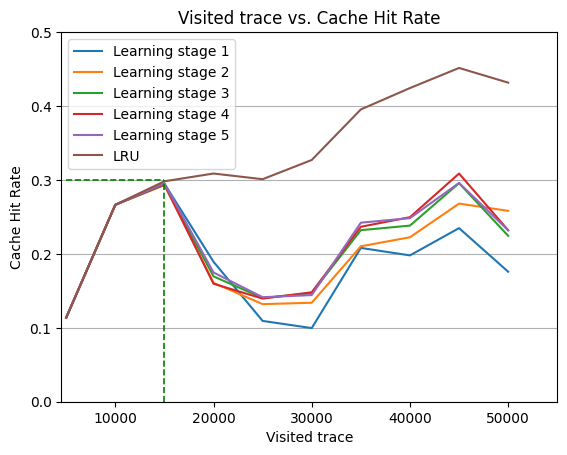

In [52]:
# Plot cache hit rates by lru and learned policy
trace_boundaries = [5000*i for i in range(1, 11)]
odds = {checkpoint: hit_rates for i, (checkpoint, hit_rates) in enumerate(map_checkpoint_to_chr.items()) if i % 2 == 0}
for i, (checkpoint, hit_rates) in enumerate(odds.items()):
    plt.plot(trace_boundaries, hit_rates, label=f"Learning stage {i+1}")

plt.axis([4500, 55000, 0, 0.5])
plt.xlabel('Visited trace')
plt.ylabel('Cache Hit Rate')
plt.title('Visited trace vs. Cache Hit Rate')
plt.plot(trace_boundaries, hit_rates_lru, label="LRU")
plt.plot([5000, 15000], [0.3, 0.3], 'g--', linewidth=1.2)
plt.plot([15000, 15000], [0, 0.3], 'g--', linewidth=1.2)
plt.legend(loc="best")
plt.grid(linestyle='-', axis='y')
plt.show()

In [ ]:
# measure hit rate by learned policy with dagger
eval_config_dagger = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned",
}

# update_frequency: 30, num_steps: 300
checkpoint_path_prefix = './result/checkpoints/model_20230822110424_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in range(30, 301, 30)]

# mesure cache hit rate by checkpoints
map_checkpoint_to_chr_dagger = measure_chr_by_checkpoints(eval_config_dagger, checkpoints)

# save cache hit rate by checkpoints
map_checkpoint_to_chr_dagger_file_path = "./result/cache_hit_rates_by_learned_policy_dagger.pkl"
save_pickle(map_checkpoint_to_chr_dagger, map_checkpoint_to_chr_dagger_file_path)

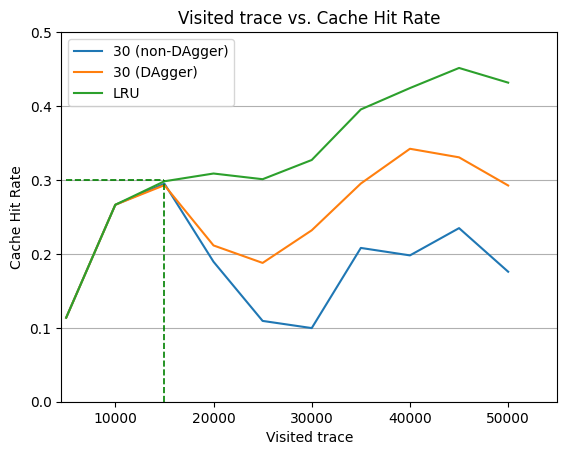

In [19]:
map_label_to_hit_rates = {}

# non dagger
map_checkpoint_to_chr_file_path = "./result/cache_hit_rates_by_learned_policy_non_dagger.pkl"
result_non_dagger = load_pickle(map_checkpoint_to_chr_file_path)
checkpoint, hit_rates = list(result_non_dagger.items())[0]
stage = checkpoint.split("_")[1].split(".")[0] + " (non-DAgger)"
map_label_to_hit_rates[stage] = hit_rates

# dagger
result_dagger = load_pickle( "./result/cache_hit_rates_by_learned_policy_dagger.pkl")
checkpoint, hit_rates = list(result_dagger.items())[0]
stage = checkpoint.split("_")[2].split(".")[0] + " (DAgger)"
map_label_to_hit_rates[stage] = hit_rates

# lru
result_lru = load_pickle( "./result/cache_hit_rates_by_lru_for_comparing_to_learned_policy_non_dagger.pkl")
map_label_to_hit_rates["LRU"] = result_lru

# plot hit rates
plot_hit_rates(map_label_to_hit_rates)

In [ ]:
# measure hit rate by learned policy with dagger
eval_config_dagger = {
    "filepath": "./dataset/wiki2018_valid.tr",
    "window_size": 50000,
    "capacity": 500000000,
    "access_history_len": 20,
    "scorer_type": "learned",
}

# update_frequency: 40, num_steps: 1000
# checkpoint_path_prefix = './result/checkpoints/model_20230822220335_'
# checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in [50,400]]

# update_frequency: 20, num_steps: 1000, batch_size: 16
# checkpoint_path_prefix = './result/checkpoints/model_20230823020957_'
checkpoints = [f"{checkpoint_path_prefix}{x}.ckpt" for x in [50,100]]

# mesure cache hit rate by checkpoints
measure_chr_by_checkpoints(eval_config_dagger, checkpoints)

Loading pickle file:  ./result/checkpoints/20230827121125/config.pkl
Loading pickle file:  ./result/checkpoints/20230827121125/eval_config.pkl
Loading pickle file:  ./result/checkpoints/20230827121125/result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_10000_60000/lru_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_10000_60000/belady_result.pkl


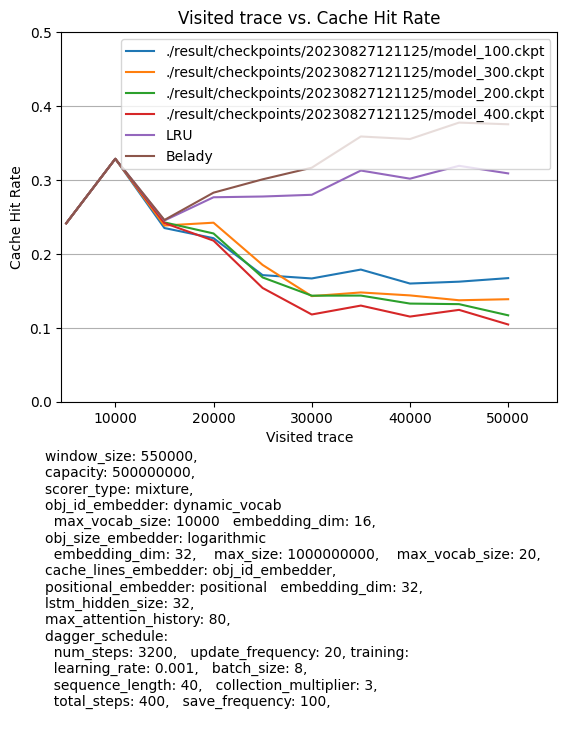

In [19]:
from evaluator import show_graph
show_graph("20230827121125", show_benchmark=True, save_graph=True, show_params=True)

Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_50000_100000//lru_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_50000_100000//belady_result.pkl
Loading pickle file:  ./result/checkpoints/20230830132122/result_wiki2018_valid_50000_100000.pkl
Loading pickle file:  ./result/checkpoints/20230830132122/config.pkl
Loading pickle file:  ./result/checkpoints/20230831213250/result_wiki2018_valid_50000_100000.pkl
Loading pickle file:  ./result/checkpoints/20230831213250/config.pkl
Loading pickle file:  ./result/checkpoints/20230826151712/result_wiki2018_valid_50000_100000.pkl
Loading pickle file:  ./result/checkpoints/20230826151712/config.pkl
Loading pickle file:  ./result/checkpoints/20230826192335/result_wiki2018_valid_50000_100000.pkl
Loading pickle file:  ./result/checkpoints/20230826192335/config.pkl


/var/folders/k2/04mk6w6s1bqcxy6h8d_gbqvw0000gn/T/ipykernel_69168/4222568386.py:27: RuntimeWarning: invalid value encountered in double_scalars
  hit_rates = [(hit_rate - lru_hit_rate) / (belady_hit_rate - lru_hit_rate) for hit_rate, lru_hit_rate, belady_hit_rate in zip(hit_rates, lru_hit_rates, belady_hit_rates)]


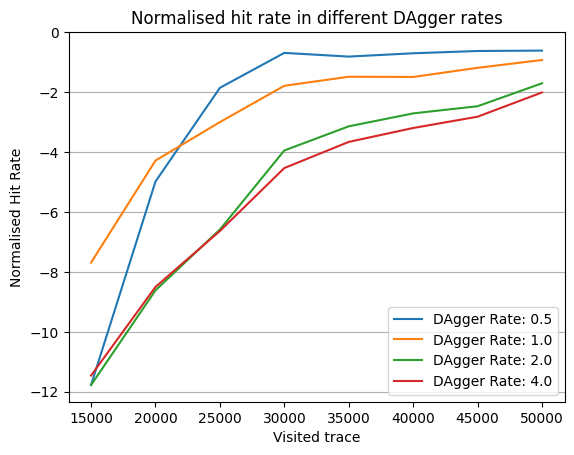

[15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]
[[nan, nan, -11.77280049296175, -4.984909588691292, -1.8584294134868609, -0.692870018328636, -0.8166978772977427, -0.7059879589944332, -0.6299912374164343, -0.6162960016163826], [nan, nan, -7.691172116876401, -4.285911637135364, -3.0018610082631803, -1.7906124477333796, -1.4882803316736042, -1.4961038298528124, -1.1917112933119163, -0.9300973684637823], [nan, nan, -11.774888448484923, -8.616087407671618, -6.587062486465203, -3.9489162381948972, -3.143312016344635, -2.7120717236600784, -2.472996180639924, -1.7072793065803211], [nan, nan, -11.458476507076046, -8.501412870445675, -6.635749862658235, -4.535765433836526, -3.6635649597220223, -3.1991275464296196, -2.8224886889273497, -2.013384076471586]]
[0.5, 1.0, 2.0, 4.0]


In [72]:
valid_data_filename = "wiki2018_valid_50000_100000"
experiment_ids = ["20230830132122", "20230831213250", "20230826151712", "20230826192335"]
x_values = list(range(15000, 55000, 5000))
y_values = []
num_steps_rates = []

# load hit rates by LRU and Belady
benchmark_result_prefix = f"./result/cache_hit_rates/{valid_data_filename}/"
lru_result_path = f"{benchmark_result_prefix}/lru_result.pkl"
belady_result_path = f"{benchmark_result_prefix}/belady_result.pkl"

lru_hit_rates = load_pickle(lru_result_path)
belady_hit_rates = load_pickle(belady_result_path)

# collect hit rates and num steps rates
for experiment_id in experiment_ids:
    result_path = f"./result/checkpoints/{experiment_id}/result_{valid_data_filename}.pkl"
    map_checkpoint_to_chr = load_pickle(result_path)

    # sort by checkpoint
    map_checkpoint_to_chr = {k: v for k, v in sorted(map_checkpoint_to_chr.items(), key=lambda item: int(item[0].split("_")[1].split(".")[0]))}

    # get first checkpoint hit rates
    hit_rates = list(map_checkpoint_to_chr.values())[-1]

    # calculate normalised hit rates with LRU(min) and Belady(max)
    hit_rates = [(hit_rate - lru_hit_rate) / (belady_hit_rate - lru_hit_rate) for hit_rate, lru_hit_rate, belady_hit_rate in zip(hit_rates, lru_hit_rates, belady_hit_rates)]
    y_values.append(hit_rates)

    # get num steps
    config_path = f"./result/checkpoints/{experiment_id}/config.pkl"
    config = load_pickle(config_path)

    # calculate num steps rate (num steps / total steps)
    num_steps = config["dagger_schedule"]["num_steps"]
    total_steps = config["training"]["total_steps"]
    # num_steps_rates.append("{:.2f}".format(num_steps / total_steps))
    num_steps_rates.append(num_steps / total_steps)

# Width of each bar
bar_width = 1200

# Create an offset for each set of bars
offsets = [ -bar_width, 0, bar_width, 2*bar_width]

# Add grid
plt.grid(linestyle='-', axis='y', zorder=0)

# Create a bar for each set of y values
for i, offset in enumerate(offsets):
    # plt.bar([x + offset for x in x_values], y_values[i][2:], width=bar_width, label=f'DAgger Rate: {num_steps_rates[i]}', zorder=3)
    plt.plot(x_values, y_values[i][2:], label=f'DAgger Rate: {num_steps_rates[i]}')

# Set x and y labels
plt.xlabel('Visited trace')
plt.ylabel('Normalised Hit Rate')
plt.yticks(range(-12, 1, 2))

# Set the title
plt.title('Normalised hit rate in different DAgger rates')

# Add legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

print(x_values)
print(y_values)
print(num_steps_rates)


Loading pickle file:  ./result/checkpoints/20230830231923/result_wiki2018_valid_10000_60000.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_10000_60000/belady_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_10000_60000/lru_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_10000_60000/random_result.pkl
Loading pickle file:  ./result/checkpoints/20230830231923/result_wiki2018_valid_50000_100000.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_50000_100000/belady_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_50000_100000/lru_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_50000_100000/random_result.pkl
Loading pickle file:  ./result/checkpoints/20230830231923/result_wiki2018_valid_100000_150000.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_100000_150000/belady_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_1000

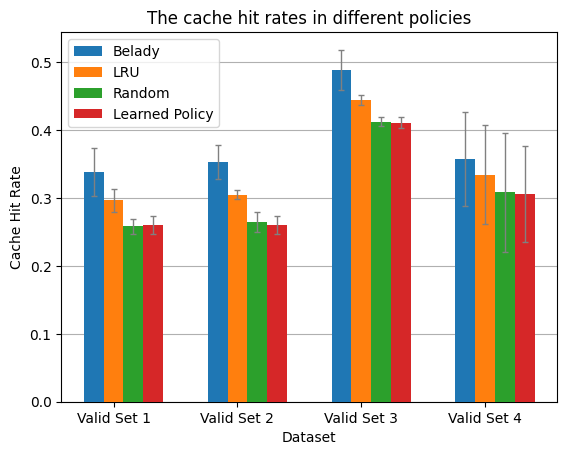

[-0.03686708110585396, -0.04402997088346938, -0.033522498642740595, -0.02920834128108618]
[-0.07839623765298509, -0.09261771080588782, -0.07769046132189339, -0.052271909448559195]


In [5]:
experiment__id = "20230830231923"
datasets = ["wiki2018_valid_10000_60000",
            "wiki2018_valid_50000_100000",
            "wiki2018_valid_100000_150000",
            "wiki2018_valid_150000_200000"]
checkpoint_dir = f"./result/checkpoints/{experiment__id}/"
benchmarks = ["belady", "lru", "random"]
policies = benchmarks + ["learned"]
labels = ["Belady", "LRU", "Random", "Learned Policy"]

# hit rates by different policies and datasets
# hit_rates = { policy: [hit_rates] }
hit_rates = {policy: [] for policy in policies}
hit_rates_error = {policy: [] for policy in policies}

# plot hit rates mesured by Benchmark policies and learned policy
for dataset in datasets:

    # load hit rates by learned policy
    result_path = f"{checkpoint_dir}result_{dataset}.pkl"
    # check if result file exists
    if not os.path.exists(result_path):
        print(f"{result_path} does not exist")
        continue
    # load result
    map_checkpoint_to_chr = load_pickle(result_path)
    # get last checkpoint hit rates
    learned_model_hit_rates = list(map_checkpoint_to_chr.values())[-1]
    # get hit rate by learned policy
    hit_rates["learned"].append(np.mean(learned_model_hit_rates[3:]))
    # calculate error
    hit_rates_error["learned"].append(np.std(learned_model_hit_rates[3:]))

    # load hit rates by benchmark policies
    benchmark_result_dir = f"./result/cache_hit_rates/{dataset.split('.')[0]}"

    for benchmark in benchmarks:
        benchmark_result_path = f"{benchmark_result_dir}/{benchmark}_result.pkl"
        if not os.path.exists(benchmark_result_path):
            print(f"{benchmark_result_path} does not exist")
            continue
        benchmark_hit_rates = load_pickle(benchmark_result_path)
        hit_rates[benchmark].append(np.mean(benchmark_hit_rates[3:]))
        # calculate error
        hit_rates_error[benchmark].append(np.std(benchmark_hit_rates[3:]))



print(hit_rates)

# plot hit rates
x_values = [x for x in range(0, 20000, 5000)]
y_values = [hit_rates[policy] for policy in policies]
y_values_error = [hit_rates_error[policy] for policy in policies]

# Width of each bar
bar_width = 800

# Create an offset for each set of bars
offsets = [-bar_width, 0, bar_width, 2*bar_width]

print(x_values)
print(y_values)

# Add grid
plt.grid(linestyle='-', axis='y', zorder=0)

# Create a bar for each set of y values
for i, offset in enumerate(offsets):
    plt.bar([x + offset for x in x_values],
            y_values[i],
            yerr=y_values_error[i],
            ecolor="gray",
            width=bar_width,
            label=labels[i],
            error_kw=dict(lw=1, capsize=2, capthick=1),
            zorder=3)

# Set x ticks
plt.xticks(x_values, [f"Valid Set {i+1}" for i in range(len(x_values))])

# Set x and y labels
plt.xlabel('Dataset')
plt.ylabel('Cache Hit Rate')

# Set the title
plt.title('The cache hit rates in different policies')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

# calculate difference between learned policy and LRU
diff = [learned_hit_rate - lru_hit_rate for learned_hit_rate, lru_hit_rate in zip(hit_rates["learned"], hit_rates["lru"])]
print(diff)

# calculate difference between learned policy and Belady
diff = [learned_hit_rate - belady_hit_rate for learned_hit_rate, belady_hit_rate in zip(hit_rates["learned"], hit_rates["belady"])]
print(diff)


Loading pickle file:  ./result/checkpoints/20230831093217/config.pkl
Loading pickle file:  ./result/checkpoints/20230831103548/config.pkl
Loading pickle file:  ./result/checkpoints/20230831213250/config.pkl
Loading pickle file:  ./result/checkpoints/20230831095624/config.pkl


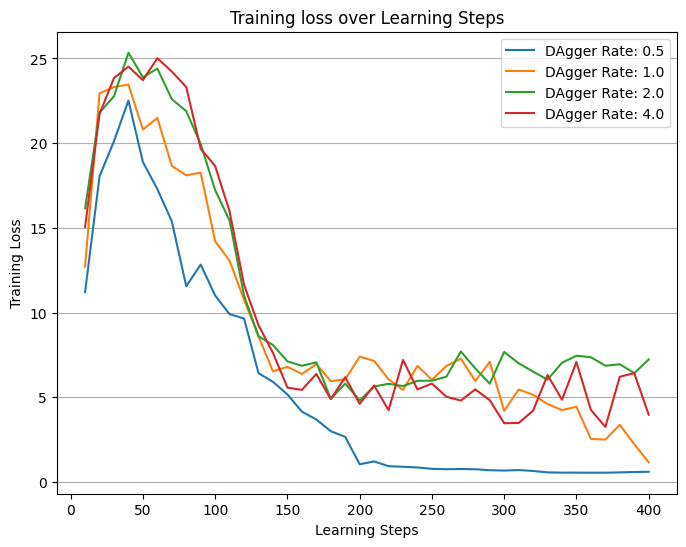

In [3]:
# plot training loss from csv file
loss_file_path = "./result/loss"

# collect all csv files
csv_files = [f"{loss_file_path}/{file}" for file in os.listdir(loss_file_path) if file.endswith(".csv")]

# extract experiment id from csv files
experiment_ids = [file.split("/")[-1].split(".")[0] for file in csv_files]

# load config from each experiment
config_file_paths = [f"./result/checkpoints/{experiment_id}/config.pkl" for experiment_id in experiment_ids]

# calculate dagger rate from config by num_steps / total_steps
dagger_rates = []
for config_file_path in config_file_paths:
    config = load_pickle(config_file_path)
    num_steps = config["dagger_schedule"]["num_steps"]
    total_steps = config["training"]["total_steps"]
    dagger_rates.append(num_steps / total_steps)

# Initialize lists to store data from each experiment
training_losses = []

# Load data from each CSV file
for filename in csv_files:
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        # Skip header
        next(reader)
        # learning step, loss
        data = [(int(row[1]), float(row[2])) for row in reader]
        training_losses.append(data)

# Sort dagger rate and training loss by dagger rate
training_losses = [x for _, x in sorted(zip(dagger_rates, training_losses))]
dagger_rates.sort()

# Plot the data for each experiment
plt.figure(figsize=(8, 6))

# Add grid
plt.grid(linestyle='-', axis='y', zorder=0)

for idx, data in enumerate(training_losses, start=1):
    steps, losses = zip(*data)
    plt.plot(steps, losses, label=f'DAgger Rate: {dagger_rates[idx-1]}')

plt.xlabel('Learning Steps')
plt.ylabel('Training Loss')
plt.title('Training loss over Learning Steps')
plt.legend(loc='best')
plt.show()


Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_200000_300000/belady_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_200000_300000/lru_result.pkl
Loading pickle file:  ./result/cache_hit_rates/wiki2018_valid_200000_300000/random_result.pkl
Loading pickle file:  ./result/checkpoints/20230830231923/result_wiki2018_valid_200000_300000.pkl


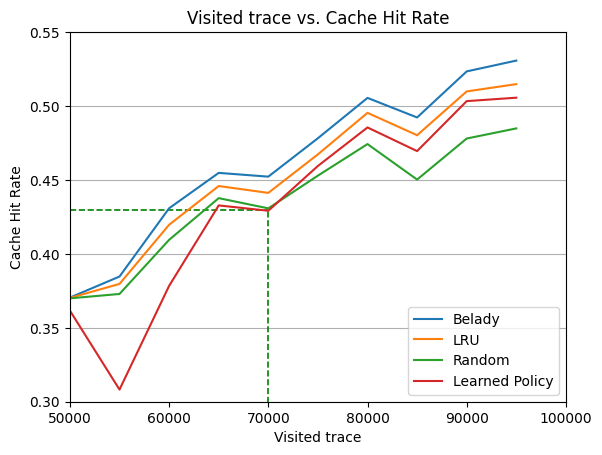

In [35]:
# plot hit rates obtained from 100000 traces
experiment__id = "20230830231923"
dataset = "wiki2018_valid_200000_300000"

# load hit rates by benchmark policies
benchmarks = ["belady", "lru", "random"]
benchmark_result_dir = f"./result/cache_hit_rates/{dataset}"

hit_rates = []
for benchmark in benchmarks:
    benchmark_result_path = f"{benchmark_result_dir}/{benchmark}_result.pkl"
    benchmark_hit_rates = load_pickle(benchmark_result_path)
    hit_rates.append(benchmark_hit_rates[10:])

# load hit rates by learned policy
result_path = f"./result/checkpoints/{experiment__id}/result_{dataset}.pkl"
hit_rates_leaned = load_pickle(result_path)

# get last checkpoint hit rates
hit_rates.append(list(hit_rates_leaned.values())[-1][10:])

# plot hit rates graph
labels = ["Belady", "LRU", "Random", "Learned Policy"]
x_values = [5000 * i for i in range(10, 20)]
y_values = hit_rates

plt.axis([50000, 100000, 0.3, 0.55])
plt.xlabel('Visited trace')
plt.ylabel('Cache Hit Rate')
plt.title('Visited trace vs. Cache Hit Rate')

# Add grid
plt.grid(linestyle='-', axis='y', zorder=0)

# show horizontal line from (50000, 0.43) to (70000, 0.43)
plt.plot([50000, 70000], [0.43, 0.43], 'g--', linewidth=1.2)
# show vertical line from (70000, 0) to (70000, 0.43)
plt.plot([70000, 70000], [0, 0.43], 'g--', linewidth=1.2)

for i, y_value in enumerate(y_values):
    plt.plot(x_values, y_value, label=labels[i])

plt.legend(loc="lower right")
plt.show()
